### Upload Kaggle API Key

1. Go to https://www.kaggle.com/account
2. Scroll down to the API section.
3. Click "Create New API Token".
4. A file called `kaggle.json` will be downloaded.

In [9]:
!pip install google.colab

ERROR: Could not find a version that satisfies the requirement google.colab (from versions: none)
ERROR: No matching distribution found for google.colab

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!pip install -q kaggle

La sintaxis del comando no es correcta.
"cp" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"chmod" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Download dataset

In [ ]:
!kaggle datasets download -d hgultekin/bbcnewsarchive
!unzip bbcnewsarchive.zip -d ./

Dataset URL: https://www.kaggle.com/datasets/hgultekin/bbcnewsarchive
License(s): copyright-authors
Archive:  bbcnewsarchive.zip
  inflating: ./bbc-news-data.csv     


# Analyze the dataset

### Read csv

In [12]:
import pandas as pd

df = pd.read_csv('bbc-news-data.csv', sep='\t')
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   filename  2225 non-null   object
 2   title     2225 non-null   object
 3   content   2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


,category,filename,title,content
count,2225,2225,2225,2225
unique,5,511,2096,2092
top,sport,385.txt,Troubled Marsh under SEC scrutiny,"Conductor Marcello Viotti, director of Venice..."
freq,511,5,2,2


### Check category distribution to see if the dataset is balanced

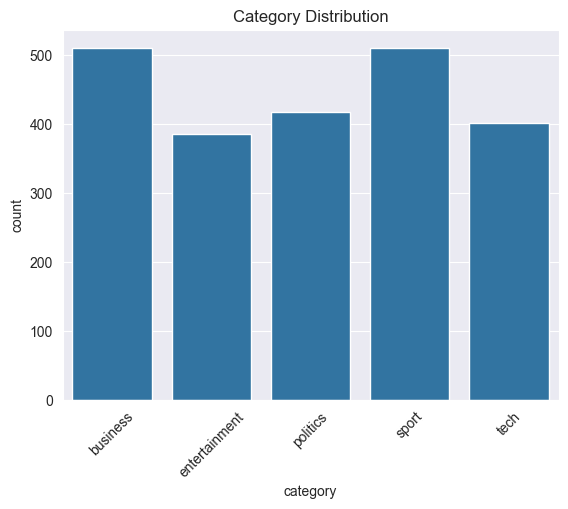

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='category')
plt.title('Category Distribution')
plt.xticks(rotation=45)
plt.show()

### Check if the dataset contain any null or empty value

In [16]:
print(df.isnull().sum())

category    0
filename    0
title       0
content     0
dtype: int64


### Analyze the articles length

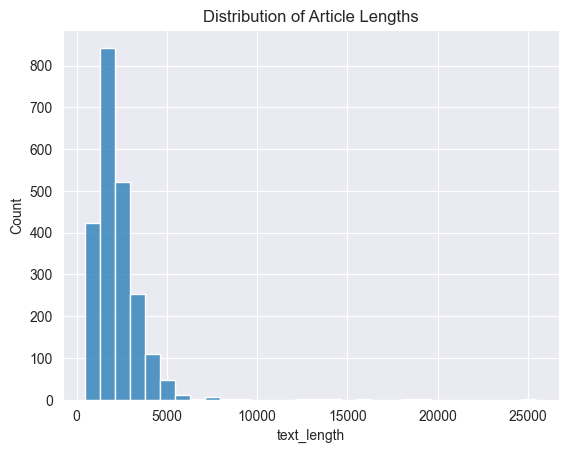

In [19]:
df['text_length'] = df['content'].apply(len)

sns.histplot(df['text_length'], bins=30)
plt.title('Distribution of Article Lengths')
plt.show()

### Analyze articles to see patterns on the categories

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nacho\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


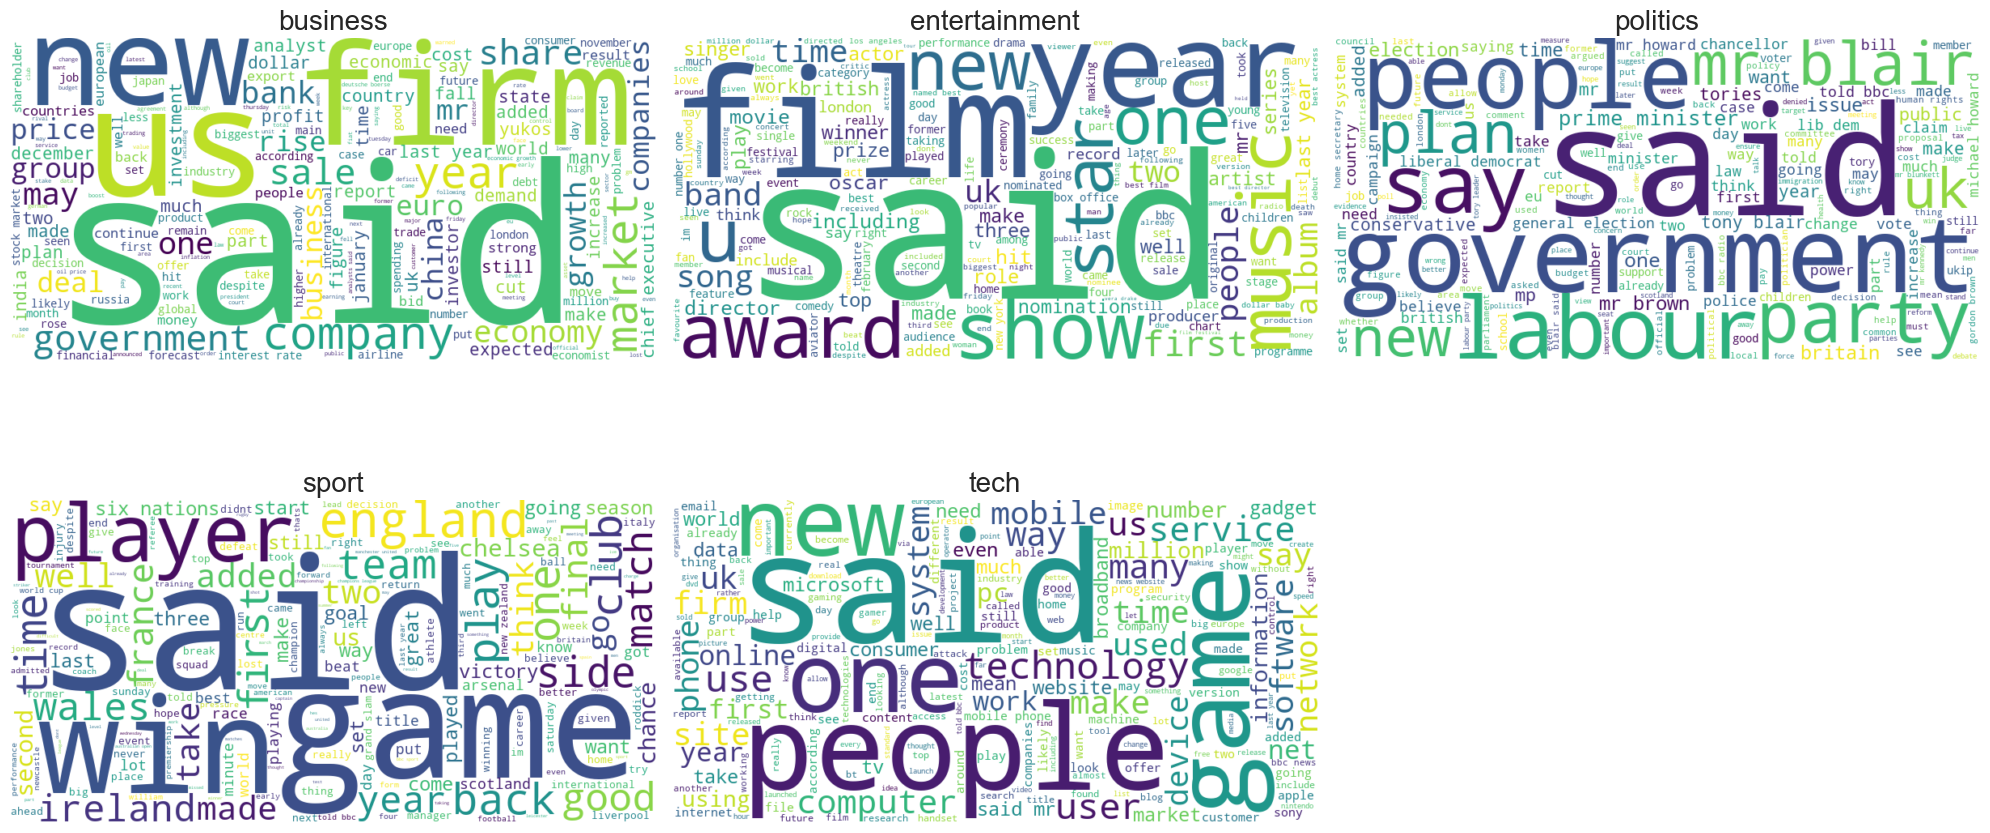

In [20]:
from wordcloud import WordCloud
import nltk
import string
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def clean_text(text):
    text = text.lower()
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['content'].apply(clean_text)


categories = df['category'].unique()

plt.figure(figsize=(20, 10))

for i, category in enumerate(categories):
    text = ' '.join(df[df['category'] == category]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    plt.subplot(2, 3, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{category}', fontsize=20)

plt.tight_layout()
plt.show()

###  Might be useful to analyze the titles as well

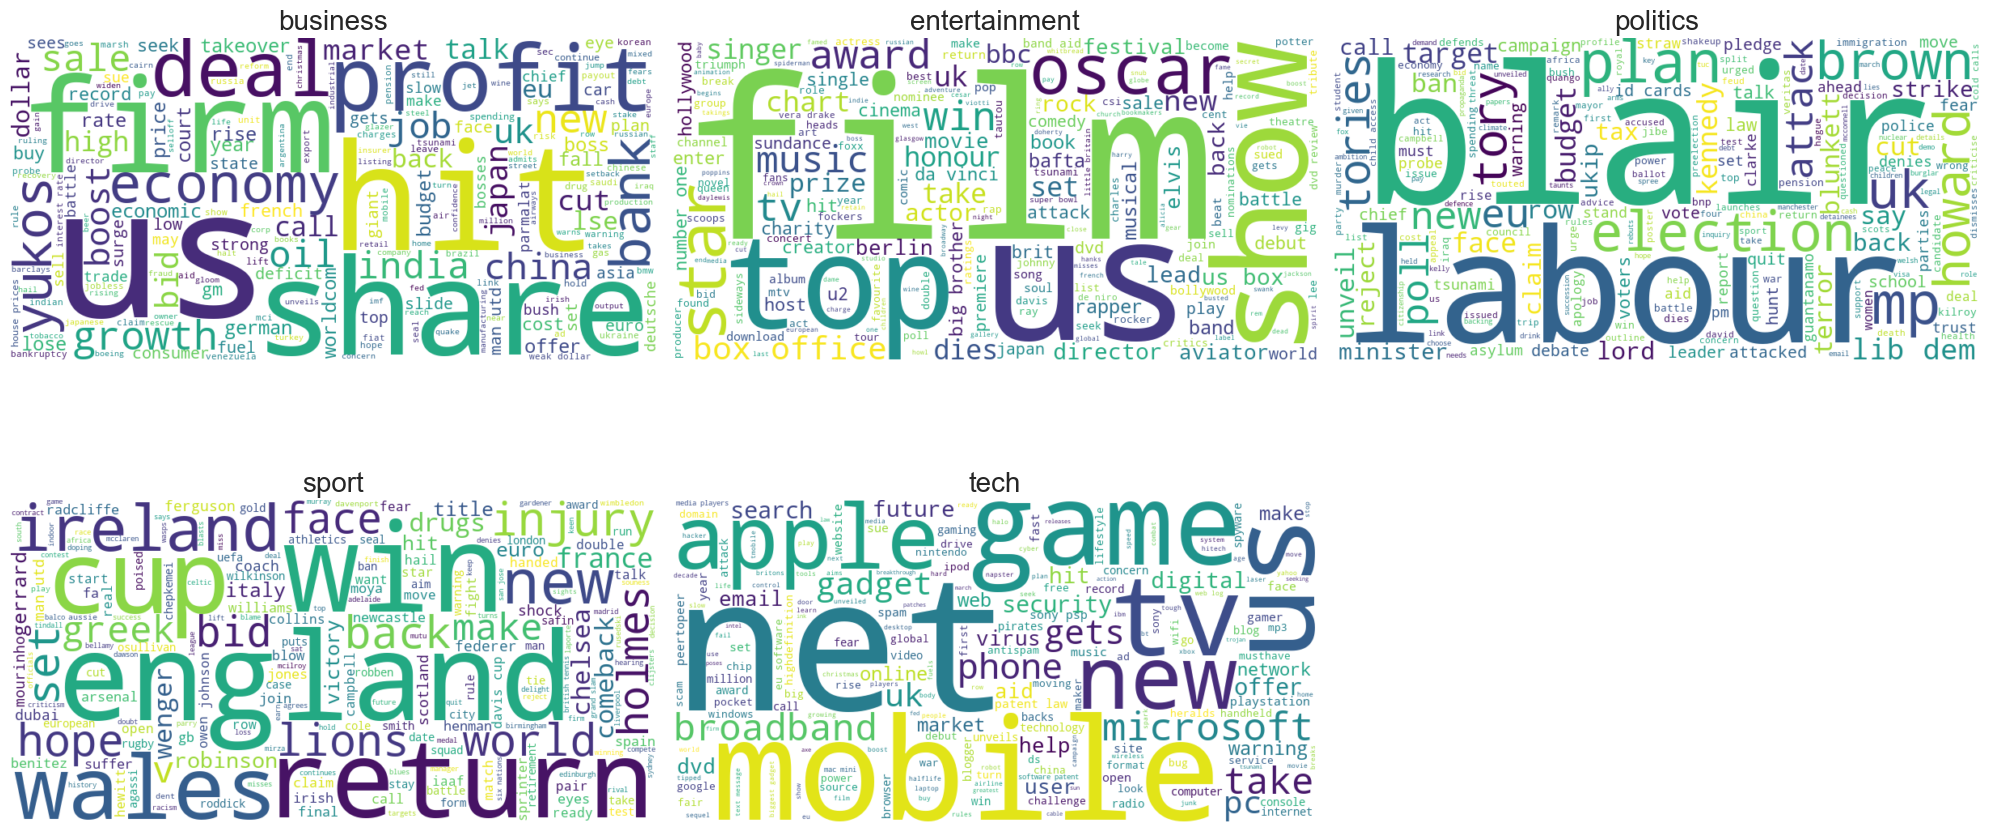

In [21]:
df['clean_title'] = df['title'].apply(clean_text)

categories = df['category'].unique()

plt.figure(figsize=(20, 10))

for i, category in enumerate(categories):
    text = ' '.join(df[df['category'] == category]['clean_title'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    plt.subplot(2, 3, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{category}', fontsize=20)

plt.tight_layout()
plt.show()

# Dataset after sanitization

In [23]:
df

,category,filename,title,content,text_length,clean_text,clean_title
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,2525,quarterly profits us media giant timewarner ju...,ad sales boost time warner profit
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,2219,dollar hit highest level euro almost three mon...,dollar gains greenspan speech
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,1517,owners embattled russian oil giant yukos ask b...,yukos unit buyer faces loan claim
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,2367,british airways blamed high fuel prices 40 dro...,high fuel prices hit bas profits
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,1535,shares uk drinks food firm allied domecq risen...,pernod takeover talk lifts domecq
...,...,...,...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,2485,bt introducing two initiatives help beat rogue...,bt program beat dialler scams
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,2253,computer users across world continue ignore se...,spam emails tempt net shoppers
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...,6258,new european directive could put software writ...,careful code
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...,2283,man making sure us computer networks safe secu...,us cyber security chief resigns


# Unsupervised learning (Center Based)

### Geda Gedi

# Supervised learning (Decisions Tree)